In [1]:
import numpy as np
#import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
print("TensorFlow version:", tf.__version__)

seed = 42
tf.keras.utils.set_random_seed(
    seed
)

C:\Users\jboak\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TensorFlow version: 2.13.0


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [4]:
data_dir

WindowsPath('C:/Users/jboak/.keras/datasets/flower_photos')

In [5]:
archive

'C:\\Users\\jboak\\.keras\\datasets\\flower_photos.tgz'

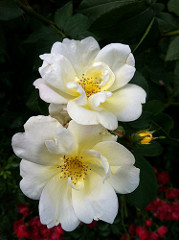

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [7]:
data_dir

WindowsPath('C:/Users/jboak/.keras/datasets/flower_photos')

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
"""
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=None)
  
"""



'\ntrain_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=None)\n  \n'

In [10]:
 
"""

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=None) 
  
"""



'\n\nval_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.2,\n  subset="validation",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=None) \n  \n'

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [14]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

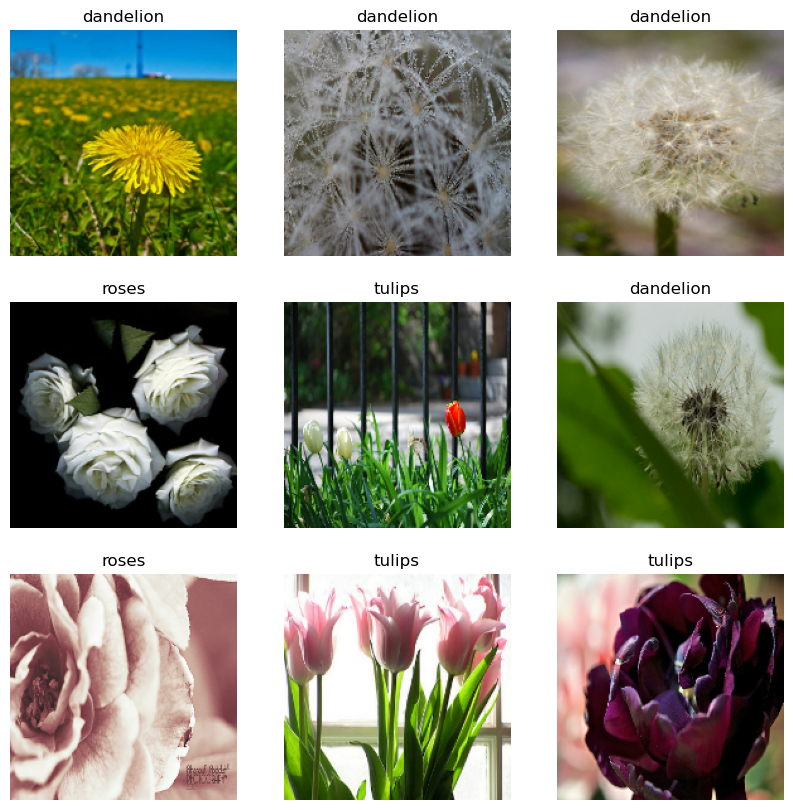

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
#Plan:
#Model 1: Follow... https://www.tensorflow.org/tutorials/load_data/images
# We may find overfitting.
#Model 2: Then use Dropout to fix the overfitting. Follow...  https://www.tensorflow.org/tutorials/quickstart/beginner


In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3

In [18]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [19]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [20]:
#model.fit(train_ds, epochs=3)

In [21]:
#model.evaluate(val_ds, verbose=2)

In [22]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 67s 701ms/step - loss: 1.2349 - accuracy: 0.4717 - val_loss: 1.0355 - val_accuracy: 0.5899
Epoch 2/3
92/92 [==============================] - 64s 689ms/step - loss: 0.9942 - accuracy: 0.6110 - val_loss: 1.0143 - val_accuracy: 0.5899
Epoch 3/3
92/92 [==============================] - 63s 685ms/step - loss: 0.8466 - accuracy: 0.6812 - val_loss: 0.9344 - val_accuracy: 0.6172


In [23]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes)
])

model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [24]:
#model2.fit(train_ds, epochs=3)

In [25]:
#model2.evaluate(val_ds, verbose=2)

In [26]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 15s 139ms/step - loss: 7.1377 - accuracy: 0.2561 - val_loss: 1.5869 - val_accuracy: 0.2589
Epoch 2/3
92/92 [==============================] - 13s 141ms/step - loss: 1.5679 - accuracy: 0.2847 - val_loss: 1.5418 - val_accuracy: 0.2520
Epoch 3/3
92/92 [==============================] - 13s 141ms/step - loss: 1.5364 - accuracy: 0.3072 - val_loss: 1.5690 - val_accuracy: 0.2439


In [27]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes)
])

model3.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [28]:
#model3.fit(train_ds, epochs=3)

In [29]:
#model3.evaluate(val_ds, verbose=2)

In [30]:
model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 66s 692ms/step - loss: 1.3416 - accuracy: 0.4067 - val_loss: 1.1544 - val_accuracy: 0.5054
Epoch 2/3
92/92 [==============================] - 64s 689ms/step - loss: 1.0895 - accuracy: 0.5651 - val_loss: 1.0046 - val_accuracy: 0.6035
Epoch 3/3
92/92 [==============================] - 63s 678ms/step - loss: 0.9525 - accuracy: 0.6410 - val_loss: 0.9365 - val_accuracy: 0.6390


In [31]:
model.fit(train_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 59s 636ms/step - loss: 0.6834 - accuracy: 0.7337
Epoch 2/3
92/92 [==============================] - 58s 627ms/step - loss: 0.4865 - accuracy: 0.8270
Epoch 3/3
92/92 [==============================] - 56s 600ms/step - loss: 0.3432 - accuracy: 0.8801


In [32]:
model.evaluate(val_ds, verbose=2)

23/23 - 4s - loss: 0.9467 - accuracy: 0.6785 - 4s/epoch - 194ms/step


[0.9466813802719116, 0.6784741282463074]

In [33]:
model2.fit(train_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 12s 124ms/step - loss: 1.5842 - accuracy: 0.2657
Epoch 2/3
92/92 [==============================] - 12s 122ms/step - loss: 1.5934 - accuracy: 0.2582
Epoch 3/3
92/92 [==============================] - 11s 117ms/step - loss: 1.5500 - accuracy: 0.2943


In [34]:
model2.evaluate(val_ds, verbose=2)

23/23 - 1s - loss: 1.5637 - accuracy: 0.2834 - 1s/epoch - 44ms/step


[1.5637277364730835, 0.2833787500858307]

In [35]:
model3.fit(train_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 56s 608ms/step - loss: 0.8349 - accuracy: 0.6955
Epoch 2/3
92/92 [==============================] - 55s 597ms/step - loss: 0.6844 - accuracy: 0.7490
Epoch 3/3
92/92 [==============================] - 55s 599ms/step - loss: 0.5158 - accuracy: 0.8069


In [36]:
model3.evaluate(val_ds, verbose=2)

23/23 - 4s - loss: 0.9605 - accuracy: 0.6444 - 4s/epoch - 185ms/step


[0.9605455994606018, 0.6444141864776611]